# INTRODUCTION

JFCNJJCS

### Data Preparation

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

In [3]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [4]:
Data=pd.read_csv('waterQuality1.csv')
Data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Notice that ammonia has inconsistent data. We need to correct the data and replace `#NUM!`

In [6]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [8]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [9]:
OriginalDataForLDA.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

From here, we observe that the number of unsafe water compared to safe water is too big of a difference. We have to resample the data to get a more equal value

In [10]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [11]:
data_0 = data_0.sample(n=7084)

In [12]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [13]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

In [14]:
!pip install imblearn

In [15]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [16]:
resampled=v_rus
resampled_variable=u_rus

In [17]:
resampled = resampled.to_frame(name="is_safe")

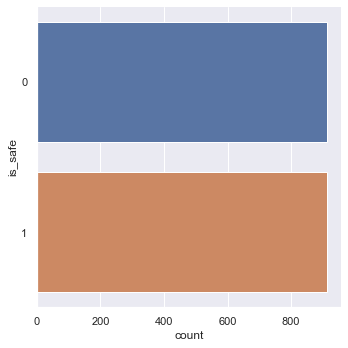

In [18]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of safe data and not safe data are now equal

In [19]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.17,3.98,0.01,2.80,0.003,6.47,0.08,0.85,1.16,0.36,...,0.067,15.29,1.89,0.010,54.05,6.47,0.09,0.48,0.01,0
1,0.07,17.56,0.06,0.55,0.070,0.11,0.07,1.37,1.39,0.27,...,0.108,4.13,1.90,0.002,7.57,0.07,0.01,0.03,0.04,0
2,0.14,28.73,0.89,0.33,0.110,0.11,0.31,0.06,1.40,0.41,...,0.001,6.14,2.17,0.003,45.70,3.52,0.02,0.27,0.08,0
3,0.09,0.86,0.07,2.26,0.010,0.47,0.06,0.13,0.30,0.20,...,0.050,17.08,2.00,0.005,0.08,0.82,0.01,0.02,0.00,0
4,0.05,1.18,0.02,1.72,0.040,0.10,0.08,0.08,0.91,0.00,...,0.041,13.57,0.33,0.005,5.00,0.15,0.02,0.00,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
1820,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
1821,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
1822,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [20]:
DescribeFrame=Data.describe()
DescribeFrame

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


We encode the data accordingly to save levels of each components

In [21]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [22]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [23]:
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,bacteria_bin,viruses_bin,lead_bin,nitrates_bin,nitrites_bin,mercury_bin,perchlorate_bin,radium_bin,selenium_bin,silver_bin
0,0.17,3.98,0.01,2.80,0.003,6.47,0.08,0.85,1.16,0.36,...,Dangerous,Safe,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
1,0.07,17.56,0.06,0.55,0.070,0.11,0.07,1.37,1.39,0.27,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
2,0.14,28.73,0.89,0.33,0.110,0.11,0.31,0.06,1.40,0.41,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
3,0.09,0.86,0.07,2.26,0.010,0.47,0.06,0.13,0.30,0.20,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
4,0.05,1.18,0.02,1.72,0.040,0.10,0.08,0.08,0.91,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Dangerous
1820,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1821,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1822,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Safe,Safe,Safe,Dangerous


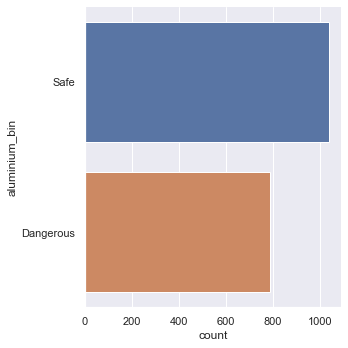

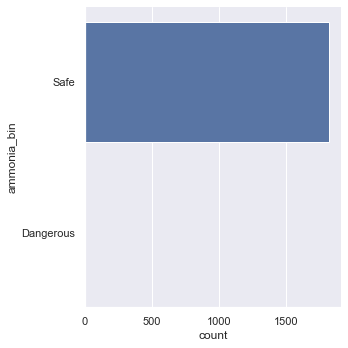

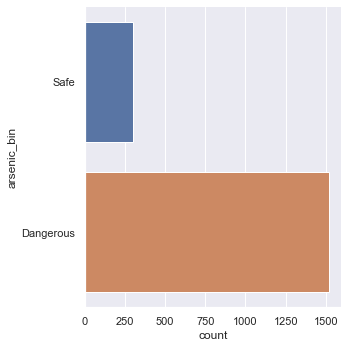

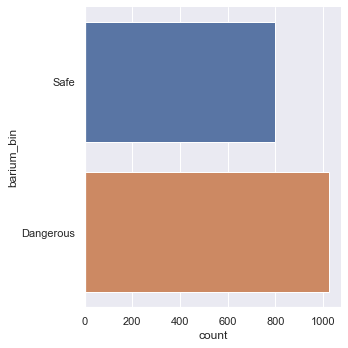

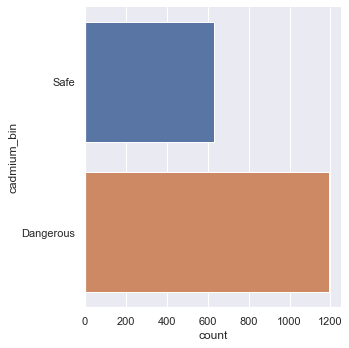

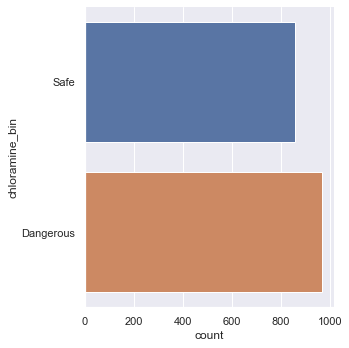

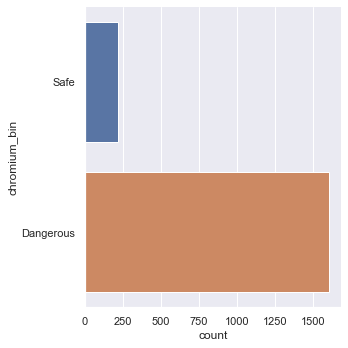

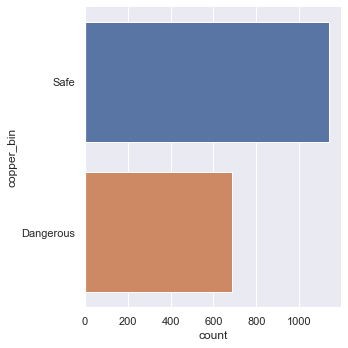

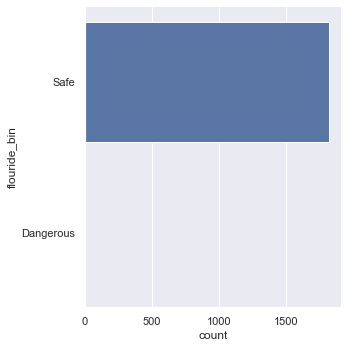

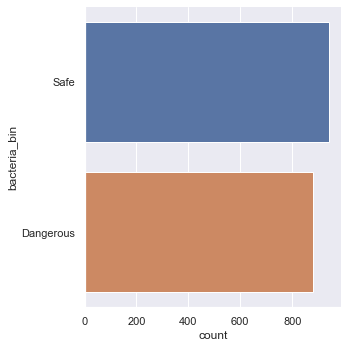

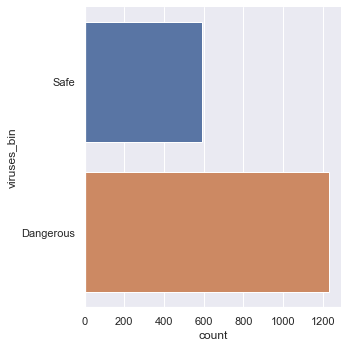

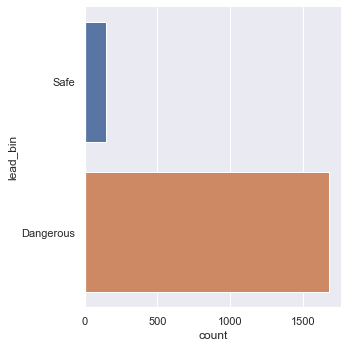

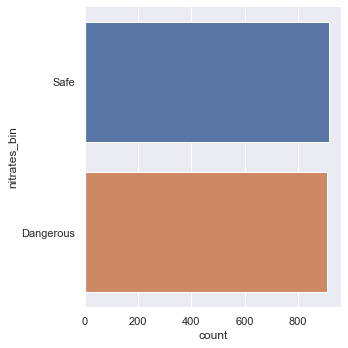

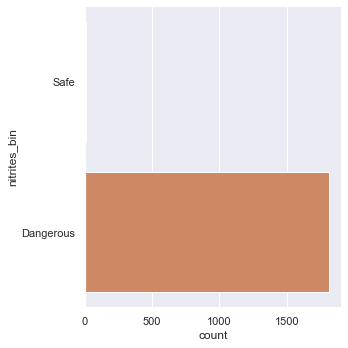

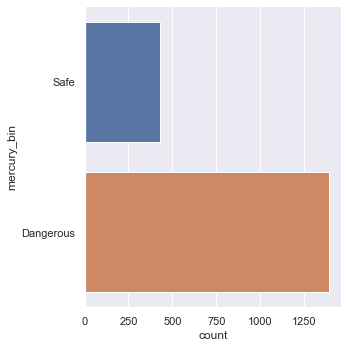

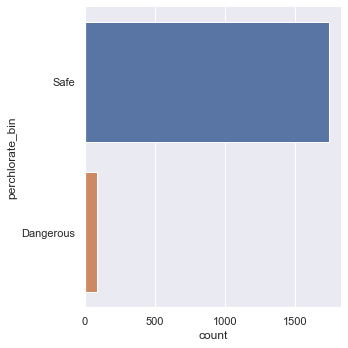

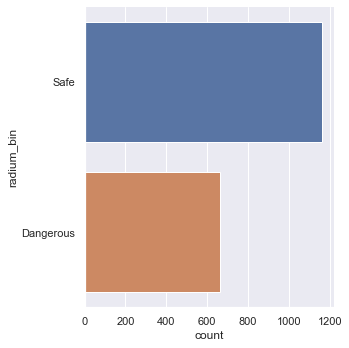

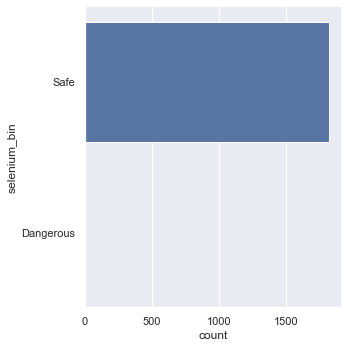

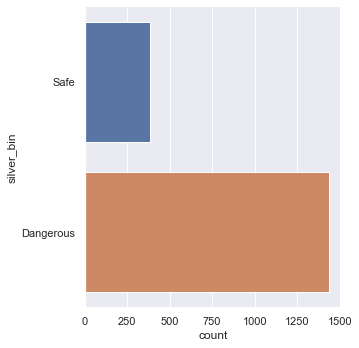

In [24]:
for y in OriginalDataForLDA.columns.values.tolist()[21:41]:
    sb.catplot(y = y, data = OriginalDataForLDA, kind = "count")

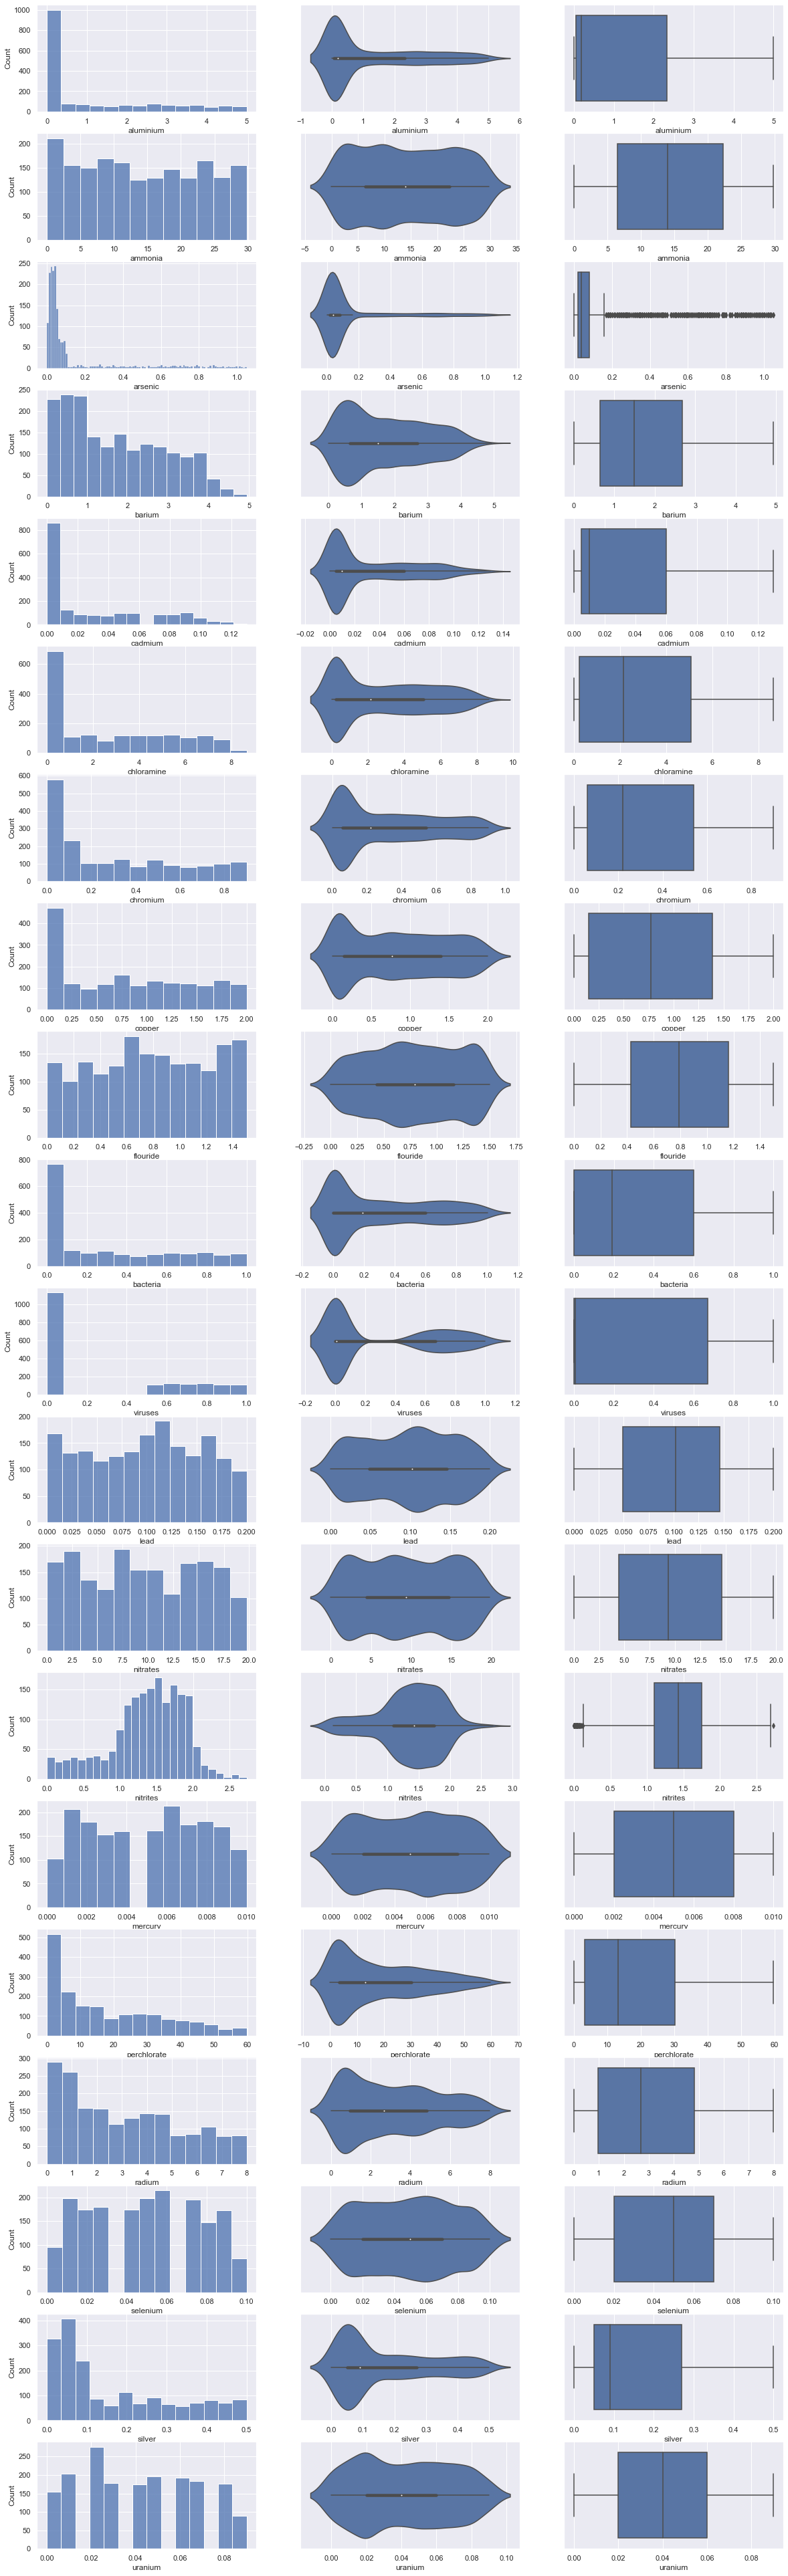

In [25]:
f, axes = plt.subplots(20, 3, figsize=(20, 70))
i=0
for y in OriginalDataForLDA.columns.values.tolist()[0:20]:
    
    sb.histplot(data = OriginalDataForLDA, x = y, ax=axes[i,0])
    sb.violinplot(data = OriginalDataForLDA,x=y, ax = axes[i,1])
    sb.boxplot(data = OriginalDataForLDA, x=y,orient = "h", ax = axes[i,2])
    i=i+1;

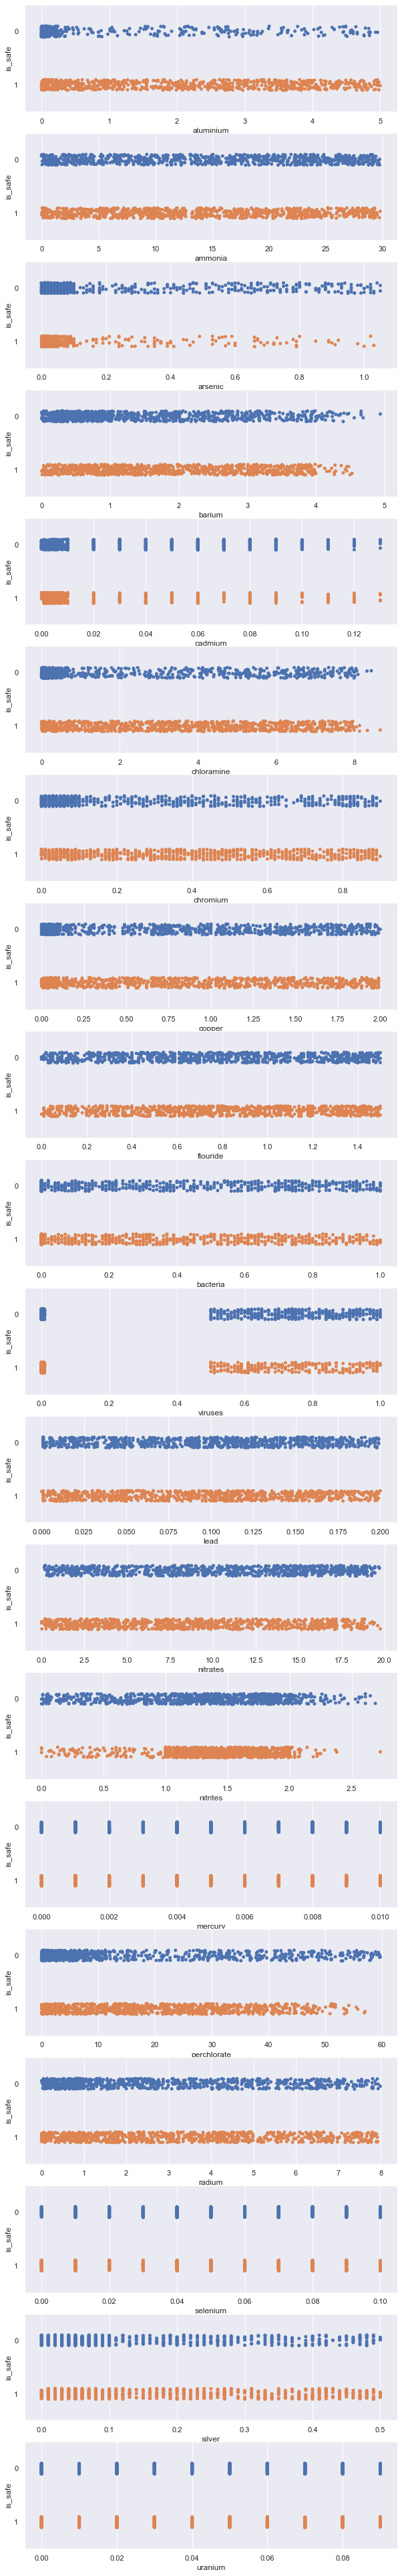

In [26]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.stripplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

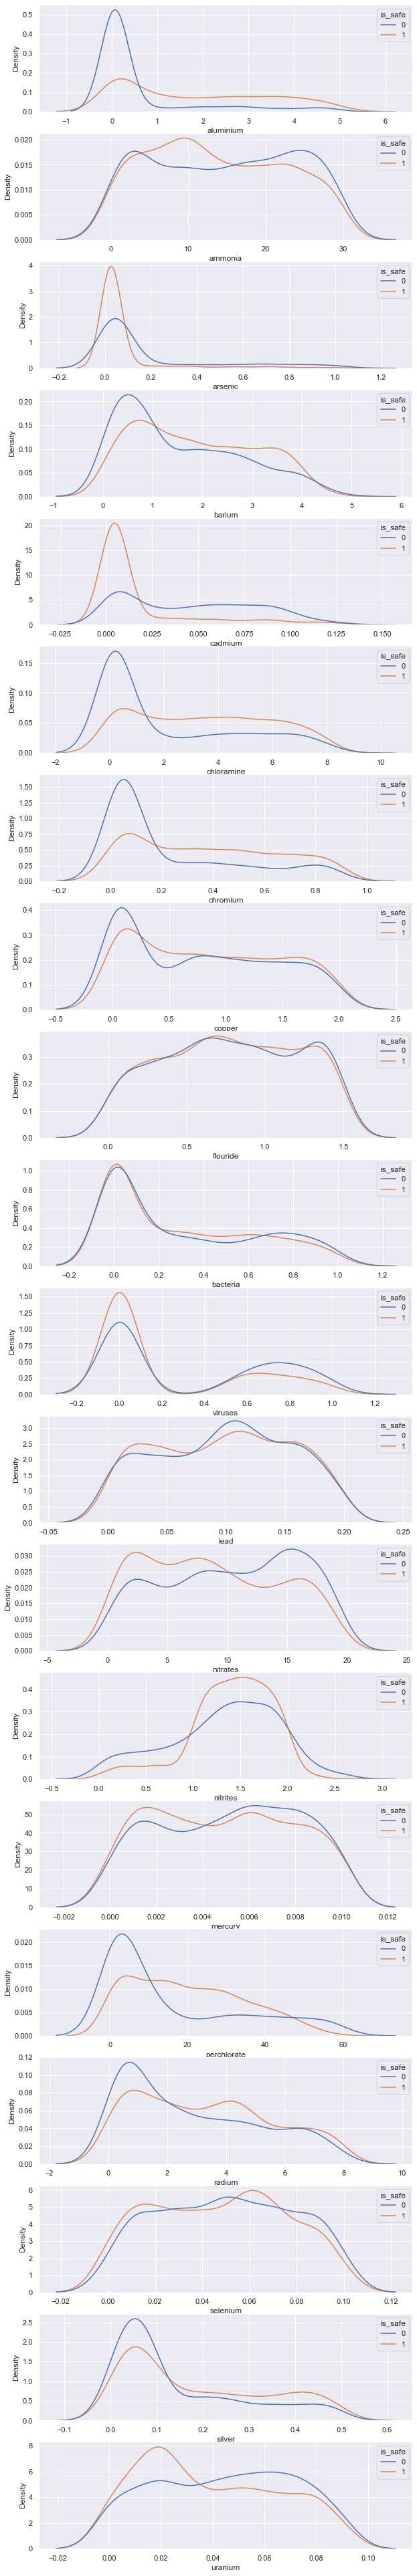

In [27]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.kdeplot(x = j, hue = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

### Random Forrest

In [28]:
# Extract Response and Predictors
y = pd.DataFrame(OriginalDataForLDA["is_safe"])
X = pd.DataFrame(OriginalDataForLDA. iloc[:, 0:19])

In [29]:
# necessary imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


In [34]:
feature_names=OriginalDataForLDA.columns[0:19]

In [35]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

aluminium      0.162596
cadmium        0.151834
perchlorate    0.079601
arsenic        0.077987
silver         0.066230
chloramine     0.063730
nitrates       0.046569
viruses        0.044938
nitrites       0.043825
chromium       0.038264
radium         0.033541
ammonia        0.032167
barium         0.031262
copper         0.028194
bacteria       0.025524
lead           0.025370
flouride       0.018308
selenium       0.017775
mercury        0.012285
dtype: float64

No handles with labels found to put in legend.


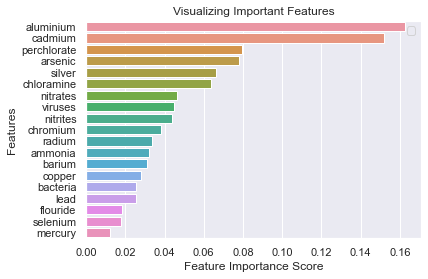

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Here shows each variable with the hightest importance score from the random forrest model. So we take the top 3 feature and test it again using the random forrest model.

In [37]:
# Extract Response and Predictors
y = pd.DataFrame(OriginalDataForLDA["is_safe"])
X = pd.DataFrame(OriginalDataForLDA[["aluminium","cadmium","perchlorate"]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835616438356164


In [39]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(OriginalDataForLDA["is_safe"])
X = pd.DataFrame(OriginalDataForLDA. iloc[:, 0:19])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [54]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

In [55]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(10,100,10),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

In [56]:
# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

In [57]:
# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy')

In [58]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=80)
0.907895510815219


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=10, n_estimators=80)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9205479452054794
